Here I understand the util functions. I use a sample game and investigate how the classes work.

In [1]:
from typing import List, Optional, Tuple
import chess
from chess import square_rank, Color, Board, Square, Piece, square_distance
from chess import KING, QUEEN, ROOK, BISHOP, KNIGHT, PAWN
from chess.pgn import ChildNode, Game
from typing import Type, TypeVar

Before experimenting the 'util' functions, it is crucial to understand what a child node is. 

#### opening a game

In [2]:
pgn = open('Data/sample_game.pgn', encoding="utf-8")

In [3]:
game = chess.pgn.read_game(pgn) # of type chess.pgn.Game

In [152]:
type(game)

chess.pgn.Game

#### Displaying a game

In [139]:
game

<Game at 0x7f17e955ee90 ('slawa' vs. 'manjiparty', '????.??.??' at 'https://lichess.org/ZmnMOSG5')>

In [140]:
for header in game.headers:
    print(f"{header}: {game.headers[header]}")
    
print(game.mainline())    

Event: Rated Classical game
Site: https://lichess.org/ZmnMOSG5
Date: ????.??.??
Round: ?
White: slawa
Black: manjiparty
Result: 1-0
UTCDate: 2014.02.28
UTCTime: 23:00:48
WhiteElo: 1859
BlackElo: 1506
WhiteRatingDiff: +3
BlackRatingDiff: -3
ECO: C44
Opening: Scotch Game: Benima Defense
TimeControl: 1800+30
Termination: Normal
1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. Nxd4 Bb4+ 6. c3 Bc5 7. O-O Nf6 8. Re1 O-O 9. Bg5 a6 10. e5 Nxd4 11. cxd4 h6 12. exf6 hxg5 13. dxc5 Qxf6 14. Qc2 b5 15. cxb6 cxb6 16. Bd5 Rb8 17. Nc3 Bb7 18. Rad1 Bxd5 19. Nxd5 Qd8 20. Rd3 Rc8 21. Qb3 b5 22. Ne7+ Kh8 23. Rh3#


#### mainline of a game and child nodes

In [4]:
game.mainline()

<Mainline at 0x7fbcbc057050 (1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. Nxd4 Bb4+ 6. c3 Bc5 7. O-O Nf6 8. Re1 O-O 9. Bg5 a6 10. e5 Nxd4 11. cxd4 h6 12. exf6 hxg5 13. dxc5 Qxf6 14. Qc2 b5 15. cxb6 cxb6 16. Bd5 Rb8 17. Nc3 Bb7 18. Rad1 Bxd5 19. Nxd5 Qd8 20. Rd3 Rc8 21. Qb3 b5 22. Ne7+ Kh8 23. Rh3#)>

In [142]:
type(game.mainline())

chess.pgn.Mainline

In [157]:
# def mainline(self) -> Mainline[ChildNode]:
# """Returns an iterable over the mainline starting after this node."""
for node in game.mainline():
    print(node) # each node is a chess.pgn.ChildNode
    print(f"move is {node.move}")
    print(node.board())
    print("-------------------------------------------------------")

1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. Nxd4 Bb4+ 6. c3 Bc5 7. O-O Nf6 8. Re1 O-O 9. Bg5 a6 10. e5 Nxd4 11. cxd4 h6 12. exf6 hxg5 13. dxc5 Qxf6 14. Qc2 b5 15. cxb6 cxb6 16. Bd5 Rb8 17. Nc3 Bb7 18. Rad1 Bxd5 19. Nxd5 Qd8 20. Rd3 Rc8 21. Qb3 b5 22. Ne7+ Kh8 23. Rh3#
move is e2e4
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
-------------------------------------------------------
1... e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. Nxd4 Bb4+ 6. c3 Bc5 7. O-O Nf6 8. Re1 O-O 9. Bg5 a6 10. e5 Nxd4 11. cxd4 h6 12. exf6 hxg5 13. dxc5 Qxf6 14. Qc2 b5 15. cxb6 cxb6 16. Bd5 Rb8 17. Nc3 Bb7 18. Rad1 Bxd5 19. Nxd5 Qd8 20. Rd3 Rc8 21. Qb3 b5 22. Ne7+ Kh8 23. Rh3#
move is e7e5
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
-------------------------------------------------------
2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. Nxd4 Bb4+ 6. c3 Bc5 7. O-O Nf6 

In [156]:
# def mainline_moves(self) -> Mainline[chess.Move]:
# """Returns an iterable over the main moves after this node."""
for move in game.mainline_moves():
    print(move)

e2e4
e7e5
g1f3
b8c6
f1c4
f8e7
d2d4
e5d4
f3d4
e7b4
c2c3
b4c5
e1g1
g8f6
f1e1
e8g8
c1g5
a7a6
e4e5
c6d4
c3d4
h7h6
e5f6
h6g5
d4c5
d8f6
d1c2
b7b5
c5b6
c7b6
c4d5
a8b8
b1c3
c8b7
a1d1
b7d5
c3d5
f6d8
d1d3
b8c8
c2b3
b6b5
d5e7
g8h8
d3h3


In [8]:
list(game.mainline())

[<ChildNode at 0x7fbcbd411890 (1. e4 ...)>,
 <ChildNode at 0x7fbcbc25e0d0 (1... e5 ...)>,
 <ChildNode at 0x7fbcbd412390 (2. Nf3 ...)>,
 <ChildNode at 0x7fbcbc056310 (2... Nc6 ...)>,
 <ChildNode at 0x7fbcbc056410 (3. Bc4 ...)>,
 <ChildNode at 0x7fbcbc056590 (3... Be7 ...)>,
 <ChildNode at 0x7fbcbc056690 (4. d4 ...)>,
 <ChildNode at 0x7fbcbc056790 (4... exd4 ...)>,
 <ChildNode at 0x7fbcbc056890 (5. Nxd4 ...)>,
 <ChildNode at 0x7fbcbc056490 (5... Bb4+ ...)>,
 <ChildNode at 0x7fbcbc056a10 (6. c3 ...)>,
 <ChildNode at 0x7fbcbc056b10 (6... Bc5 ...)>,
 <ChildNode at 0x7fbcbc056c50 (7. O-O ...)>,
 <ChildNode at 0x7fbcbc056d50 (7... Nf6 ...)>,
 <ChildNode at 0x7fbcbc056e90 (8. Re1 ...)>,
 <ChildNode at 0x7fbcbc056f90 (8... O-O ...)>,
 <ChildNode at 0x7fbcbc057090 (9. Bg5 ...)>,
 <ChildNode at 0x7fbcbc057190 (9... a6 ...)>,
 <ChildNode at 0x7fbcbc057290 (10. e5 ...)>,
 <ChildNode at 0x7fbcbc057390 (10... Nxd4 ...)>,
 <ChildNode at 0x7fbcbc057490 (11. cxd4 ...)>,
 <ChildNode at 0x7fbcbc057590 (11

In [10]:
for node in list(game.mainline()):
    print(node)
    print("--------------------------------------------------")

1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. Nxd4 Bb4+ 6. c3 Bc5 7. O-O Nf6 8. Re1 O-O 9. Bg5 a6 10. e5 Nxd4 11. cxd4 h6 12. exf6 hxg5 13. dxc5 Qxf6 14. Qc2 b5 15. cxb6 cxb6 16. Bd5 Rb8 17. Nc3 Bb7 18. Rad1 Bxd5 19. Nxd5 Qd8 20. Rd3 Rc8 21. Qb3 b5 22. Ne7+ Kh8 23. Rh3#
--------------------------------------------------
1... e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. Nxd4 Bb4+ 6. c3 Bc5 7. O-O Nf6 8. Re1 O-O 9. Bg5 a6 10. e5 Nxd4 11. cxd4 h6 12. exf6 hxg5 13. dxc5 Qxf6 14. Qc2 b5 15. cxb6 cxb6 16. Bd5 Rb8 17. Nc3 Bb7 18. Rad1 Bxd5 19. Nxd5 Qd8 20. Rd3 Rc8 21. Qb3 b5 22. Ne7+ Kh8 23. Rh3#
--------------------------------------------------
2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. Nxd4 Bb4+ 6. c3 Bc5 7. O-O Nf6 8. Re1 O-O 9. Bg5 a6 10. e5 Nxd4 11. cxd4 h6 12. exf6 hxg5 13. dxc5 Qxf6 14. Qc2 b5 15. cxb6 cxb6 16. Bd5 Rb8 17. Nc3 Bb7 18. Rad1 Bxd5 19. Nxd5 Qd8 20. Rd3 Rc8 21. Qb3 b5 22. Ne7+ Kh8 23. Rh3#
--------------------------------------------------
2... Nc6 3. Bc4 Be7 4. d4 exd4 5. Nxd4 Bb4+ 6. 

In [163]:
# The last node
game.end()

<ChildNode at 0x7f17e9560a50 (23. Rh3# ...)>

In [160]:
# game.mainline() returns an iterable, not an iterator. 
# To fix this, you need to explicitly convert it to an iterator using the iter() function. 
mainline_iterator = iter(game.mainline())
first_node = next(mainline_iterator)

In [161]:
first_node

<ChildNode at 0x7f17e9563c10 (1. e4 ...)>

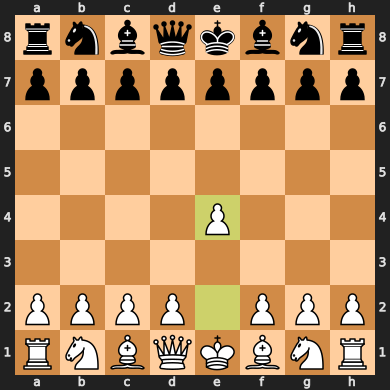

In [162]:
first_node.board()

#### We start with the 'util' functions one by one. First function pp

In [173]:
A = TypeVar('A')
def pp(a: A, msg = None) -> A:
    print(f'{msg + ": " if msg else ""}{a}')
    return a

The parameter 'A' a string that names the type variable. It’s just a label and doesn’t have any functional impact. A is the type variable itself, created by TypeVar. It can be used as a placeholder for any type in type hints.

#### moved_piece_type

In [175]:
def moved_piece_type(node: ChildNode) -> chess.PieceType:
    pt = node.board().piece_type_at(node.move.to_square)
    assert(pt) # makes sure that pt is not None or False
    return pt

In [169]:
first_node.board().piece_type_at(first_node.move.to_square) # 1 is PAWN

1

In [170]:
first_node.move.to_square

28

#### is_advanced_pawn_move

advanced pawn move means:
1. a promotion, or 
2. a white's pawn move to one of the last 3 ranks (namely 5,6, and 7), or
3. a black's pawn move to one of the first 3 ranks (namely 0,1, and 2)

In [ ]:
def is_advanced_pawn_move(node: ChildNode) -> bool:
    if node.move.promotion:
        return True
    if moved_piece_type(node) != chess.PAWN:
        return False
    to_rank = square_rank(node.move.to_square)
    return to_rank < 3 if node.turn() else to_rank > 4

In [176]:
square_rank(first_node.move.to_square) # 0 is the first rank

3

Actually there is no need to check move.promotion, because if a move is promotion, to_rank outputs 0 or 7 as I show in the next function section.

#### is_very_advanced_pawn_move

1. a promotion, or
2. a white's pawn move to one of the last 2 ranks (namely 6 and 7), or
3. a black's pawn move to one of the first 2 ranks (namely 1 and 2). 

In [ ]:
def is_very_advanced_pawn_move(node: ChildNode) -> bool:
    if not is_advanced_pawn_move(node):
        return False
    to_rank = square_rank(node.move.to_square)
    return to_rank < 2 if node.turn() else to_rank > 5

In [197]:
# if a move is a promotion, square_rank would output 7
# this is an example of a puzzle that includes a promotion. its id is 5j5bA
fen = "2b5/8/PR2Pk2/2p2n2/5K2/2P5/1P4r1/8 b - - 0 47"
board = Board(fen)
moves = ["g2g7", "e6e7", "f6f7", "a6a7", "f5e7"]
for move in moves:
    move = chess.Move.from_uci(move)
    board.push(move)
promotion_move = "a7a8q"

In [198]:
promotion_move = chess.Move.from_uci(promotion_move)
print(promotion_move)

a7a8q


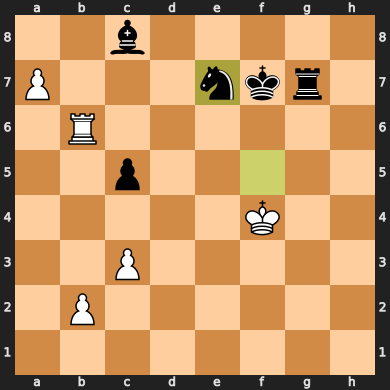

In [200]:
board

In [201]:
square_rank(promotion_move.to_square)

7

Actually there is no need to look up a puzzle. Running square_rank(promotion_move.to_square) is independent of the board.

#### is_king_move

Checks if the node's move was a king move. Remember that node.move is the move that lead to that node. Check the section 'mainline of a game and child nodes'

In [ ]:
def is_king_move(node: ChildNode) -> bool:
    return moved_piece_type(node) == chess.KING

#### is_castling

In [202]:
def is_castling(node: ChildNode) -> bool:
    return is_king_move(node) and square_distance(node.move.from_square, node.move.to_square) > 1

#### is_capture

In [203]:
def is_capture(node: ChildNode) -> bool:
    return node.parent.board().is_capture(node.move)

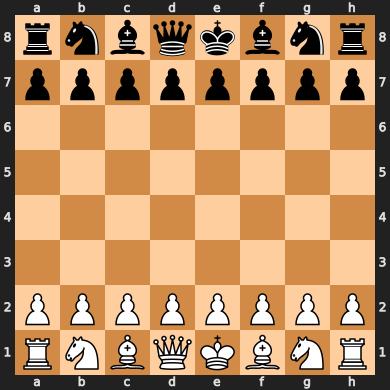

In [206]:
# the parent node of first_node is the initial position.
parent_node = first_node.parent
parent_node.board()

Recall that .is_capture should be used before pushing the move (that we want to know if a capture or not) to the board. This is why we call it on the parent node.

#### next_node

In [207]:
def next_node(node: ChildNode) -> Optional[ChildNode]:
    return node.variations[0] if node.variations else None

In [211]:
first_node.variations # a list of child nodes

[<ChildNode at 0x7f17e9563b10 (1... e5 ...)>]

In [209]:
first_node.variations[0]

<ChildNode at 0x7f17e9563b10 (1... e5 ...)>

In [216]:
second_node = next_node(first_node)
second_node

<ChildNode at 0x7f17e9563b10 (1... e5 ...)>

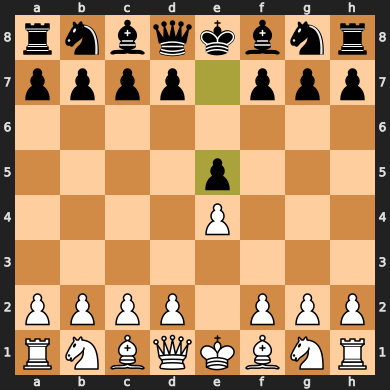

In [217]:
second_node.board()

#### next_next_node

In [212]:
def next_next_node(node: ChildNode) -> Optional[ChildNode]:
    nn = next_node(node)
    return next_node(nn) if nn else None

In [219]:
third_node = next_next_node(first_node)
third_node

<ChildNode at 0x7f17e9562990 (2. Nf3 ...)>

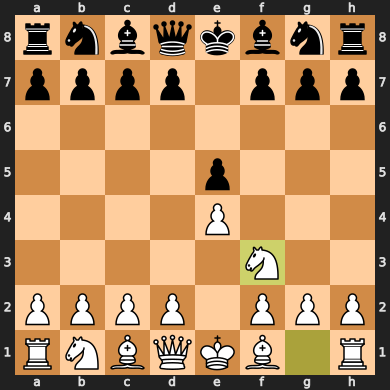

In [218]:
third_node.board()

#### pieces values and ray pieces

In [29]:
values = { PAWN: 1, KNIGHT: 3, BISHOP: 3, ROOK: 5, QUEEN: 9 }
king_values = { PAWN: 1, KNIGHT: 3, BISHOP: 3, ROOK: 5, QUEEN: 9, KING: 99 }
ray_piece_types = [QUEEN, ROOK, BISHOP]

#### piece_value

In [220]:
def piece_value(piece_type: chess.PieceType) -> int:
    return values[piece_type]

#### material_count

In [225]:
def material_count(board: Board, side: Color) -> int:
    return sum(len(board.pieces(piece_type, side)) * value for piece_type, value in values.items())

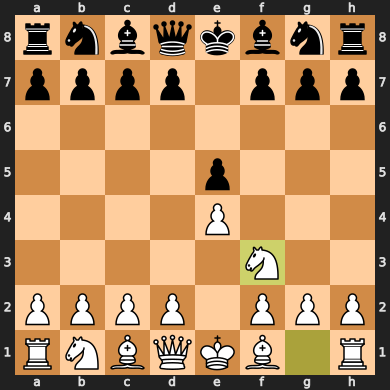

In [226]:
board = third_node.board()
board

In [229]:
material_count(board, chess.WHITE)

39

In [230]:
for piece_type, value in values.items():
    print(piece_type, value)

1 1
2 3
3 3
4 5
5 9


In [239]:
for piece_type in [PAWN, KNIGHT, BISHOP, ROOK, QUEEN]:
    print(piece_type)
    print(board.pieces(piece_type, chess.WHITE))
    print(f"how many pieces? {len(board.pieces(piece_type, chess.WHITE))}")
    print("----------------------------------------------------")

1
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . 1 . . .
. . . . . . . .
1 1 1 1 . 1 1 1
. . . . . . . .
how many pieces? 8
----------------------------------------------------
2
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . 1 . .
. . . . . . . .
. 1 . . . . . .
how many pieces? 2
----------------------------------------------------
3
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . 1 . . 1 . .
how many pieces? 2
----------------------------------------------------
4
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
1 . . . . . . 1
how many pieces? 2
----------------------------------------------------
5
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . 1 . . . .
how many pieces? 1
-------------------------------------------

#### material_diff

In [240]:
def material_diff(board: Board, side: Color) -> int:
    return material_count(board, side) - material_count(board, not side)

#### attacked_opponent_pieces and attacked_opponent_squares

In [259]:
def attacked_opponent_pieces(board: Board, from_square: Square, pov: Color) -> List[Piece]:
    """ pov is the color of the attacker. from_square is the square where the attacker piece lives"""
    return [piece for (piece, _) in attacked_opponent_squares(board, from_square, pov)]

def attacked_opponent_squares(board: Board, from_square: Square, pov: Color) -> List[Tuple[Piece, Square]]:
    pieces = []
    for attacked_square in board.attacks(from_square):
        attacked_piece = board.piece_at(attacked_square)
        if attacked_piece and attacked_piece.color != pov:
            pieces.append((attacked_piece, attacked_square))
    return pieces

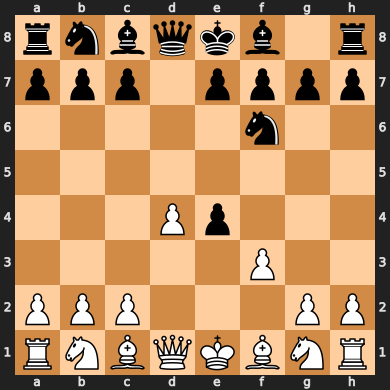

In [243]:
# Let us take as example one of my blitz games. I play black
fen = 'rnbqkb1r/ppp1pppp/5n2/8/3Pp3/5P2/PPP3PP/RNBQKBNR w KQkq - 1 4'
board = Board(fen)
board

In [244]:
attacked_opponent_squares(board, 59, chess.BLACK)

[(Piece.from_symbol('P'), 27)]

In [258]:
attacked_opponent_pieces(board, 59, chess.BLACK)

[Piece.from_symbol('P')]

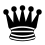

In [245]:
board.piece_at(59)

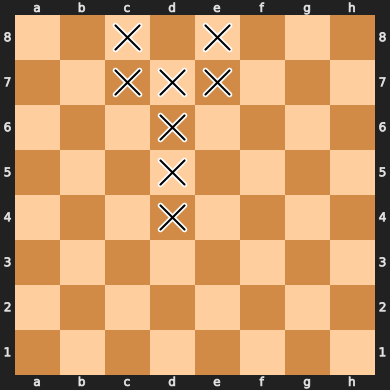

In [248]:
board.attacks(59)

In [256]:
def attacked_opponent_squares_with_prints(board: Board, from_square: Square, pov: Color) -> List[Tuple[Piece, Square]]:
    pieces = []
    for attacked_square in board.attacks(from_square):
        attacked_piece = board.piece_at(attacked_square)
        print(f"attacked square {chess.square_name(attacked_square)} attacked piece {attacked_piece}")
        if attacked_piece and attacked_piece.color != pov:
            print('valid')
            pieces.append((attacked_piece, attacked_square))
        print("---------------------------------------------------------")      
    return pieces

In [257]:
attacked_opponent_squares_with_prints(board, 59, chess.BLACK)

attacked square d4 attacked piece P
valid
---------------------------------------------------------
attacked square d5 attacked piece None
---------------------------------------------------------
attacked square d6 attacked piece None
---------------------------------------------------------
attacked square c7 attacked piece p
---------------------------------------------------------
attacked square d7 attacked piece None
---------------------------------------------------------
attacked square e7 attacked piece p
---------------------------------------------------------
attacked square c8 attacked piece b
---------------------------------------------------------
attacked square e8 attacked piece k
---------------------------------------------------------


[(Piece.from_symbol('P'), 27)]

#### is_defended and is_hanging

hanging simply means not defended. It doesn't necessarily mean not defended and attacked.

In [40]:
def is_defended(board: Board, piece: Piece, square: Square) -> bool:
    """ 
    checks if some piece on some square is defended.
    The piece parameter should be in this format: chess.Piece(chess.KNIGHT, chess.BLACK) 
    """
    if board.attackers(piece.color, square):
        return True
    # ray defense https://lichess.org/editor/6k1/3q1pbp/2b1p1p1/1BPp4/rp1PnP2/4PRNP/4Q1P1/4B1K1_w_-_-_0_1
    # look at the black rook
    for attacker in board.attackers(not piece.color, square):
        attacker_piece = board.piece_at(attacker)
        assert(attacker_piece)
        if attacker_piece.piece_type in ray_piece_types:
            bc = board.copy(stack = False)
            bc.remove_piece_at(attacker)
            if bc.attackers(piece.color, square):
                return True

    return False

def is_hanging(board: Board, piece: Piece, square: Square) -> bool:
    return not is_defended(board, piece, square)

##### Example

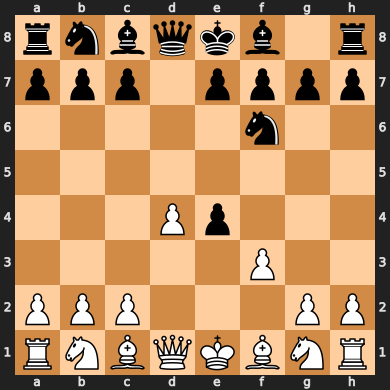

In [3]:
# Let us take as example the same board from the previous section. 
fen = 'rnbqkb1r/ppp1pppp/5n2/8/3Pp3/5P2/PPP3PP/RNBQKBNR w KQkq - 1 4'
board = Board(fen)
board

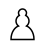

In [6]:
board.piece_at(27)

In [11]:
PAWN, type(PAWN)

(1, int)

In [9]:
# GIVES AN ERROR
is_defended(board, PAWN, 27)

AttributeError: 'int' object has no attribute 'color'

In [17]:
# this works
is_defended(board, chess.Piece(chess.PAWN, chess.WHITE), chess.D4)

True

##### understanding board.attackers: Gets the set of attackers of the given color for the given square.

The goal of using: </br>
def is_defended(board: Board, piece: Piece, square: Square) </br>
    if board.attackers(piece.color, square): </br>
            return True </br>
Intuitively, when calling board.attackers(color, square), you would choose the color to be of the opponent of the color on the square.          
However, if a piece of the same color is an "attacker" according to the attackers function, it means it is actually a defender. Here is an example:

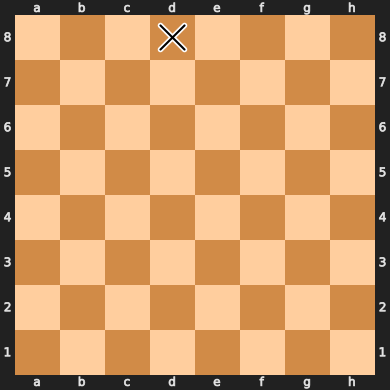

In [19]:
# the piece of d4 is white.
board.attackers(chess.BLACK, chess.D4)

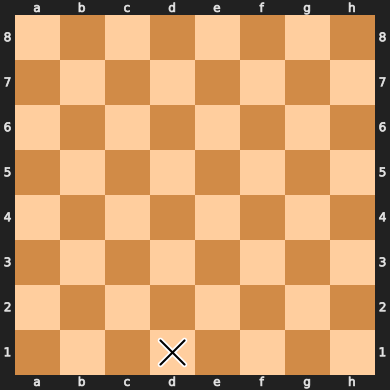

In [22]:
# If the piece is white and you set the color parameter to white, board.attackers doesn't return an error.
# It actually treats white pieces as if they were black. 
board.attackers(chess.WHITE, chess.D4)

In [23]:
type(board.attackers(chess.WHITE, chess.D4))

chess.SquareSet

In [24]:
for attacker in board.attackers(chess.WHITE, chess.D4):
    print(attacker)

3


so the attacker is the Square number.

##### understanding the for loop in is_defended

This example makes it very clear. Focus on the black rook at a4. Basically, it is defended by the black bishop on c6, but the attacker (the white bishop) is in the middle (on b5).

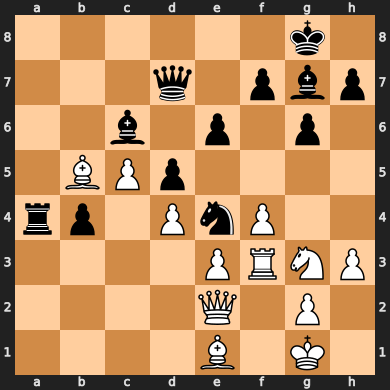

In [43]:
board=Board("6k1/3q1pbp/2b1p1p1/1BPp4/rp1PnP2/4PRNP/4Q1P1/4B1K1 w - - 0 1")
board

In [44]:
is_defended(board, chess.Piece(chess.ROOK, chess.BLACK), chess.A4)

True

#### can_be_taken_by_lower_piece

In [39]:
def can_be_taken_by_lower_piece(board: Board, piece: Piece, square: Square) -> bool:
    """ we discard the case where the attacker is the king """
    for attacker_square in board.attackers(not piece.color, square):
        attacker = board.piece_at(attacker_square)
        assert(attacker)
        if attacker.piece_type != chess.KING and values[attacker.piece_type] < values[piece.piece_type]:
            return True
    return False

#### is_in_bad_spot

A piece is considered to be in a bad spot if it is: **attacked and hanging** OR **attacked by a lower piece**

In [46]:
def is_in_bad_spot(board: Board, square: Square) -> bool:
    piece = board.piece_at(square)
    assert(piece)
    return (bool(board.attackers(not piece.color, square)) and
            (is_hanging(board, piece, square) or can_be_taken_by_lower_piece(board, piece, square)))

#### is_trapped

**Caution!** is_trapped might change the board as it may push the move that saves the trapped piece to the board.

A trapped piece is a piece situated at a bad spot and doesn't have an escape! How about a case where the piece is not directly attacked, but if tries escaping, it gets into a bad spot. Have a look at the bishop's position in Example(2).

In [109]:
def is_trapped(board: Board, square: Square) -> bool:
    # board.is_check() tests if the current side to move is in check.
    # board.is_pinned detects if the given square is pinned to the king of the given color.
    # board.turn return True (False) if it is white's (black's) turn.
    """ a pinned square is NOT considered trapped """
    if board.is_check() or board.is_pinned(board.turn, square):
        return False
    piece = board.piece_at(square)
    assert(piece)
    """ 'trapped' doesn't apply to pawns and kings """
    if piece.piece_type in [PAWN, KING]:
        return False
    # if the piece is not in a bad spot, then it is not trapped
    # not in a bad spot means: (NOT(attacked and hanging)) AND (NOT(attacked by a lower piece))
    if not is_in_bad_spot(board, square):
        return False    
    for escape in board.legal_moves:
        if escape.from_square == square:
            print("one escape option")
            capturing = board.piece_at(escape.to_square)
            print(f"to_square {escape.to_square} where there is the piece {capturing}")
            if capturing and values[capturing.piece_type] >= values[piece.piece_type]:
                return False
            print("capturing is not an option")    
            board.push(escape)
            print(f"pushing the move {escape}")
            if not is_in_bad_spot(board, escape.to_square):
                print("finally not in a bad spot!")
                return False
            board.pop()
            print(f"popping the move {escape}")
    return True

##### Example(1): first game from this article
https://www.chess.com/article/view/trapping-pieces

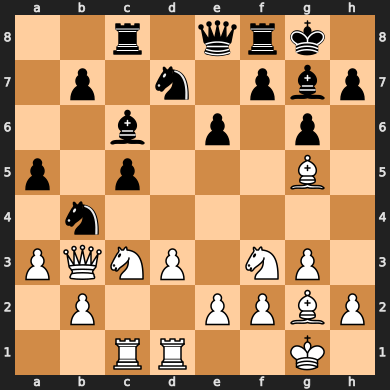

In [110]:
board = Board("2r1qrk1/1p1n1pbp/2b1p1p1/p1p3B1/1n6/PQNP1NP1/1P2PPBP/2RR2K1 b - - 0 16")
board

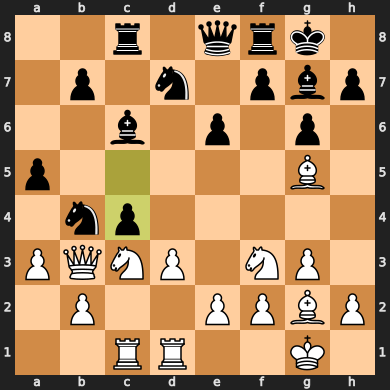

In [111]:
move = chess.Move.from_uci("c5c4")
board.push(move)
board

In [112]:
board.fen

<bound method Board.fen of Board('2r1qrk1/1p1n1pbp/2b1p1p1/p5B1/1np5/PQNP1NP1/1P2PPBP/2RR2K1 w - - 0 17')>

In [113]:
is_trapped(board, chess.B3)

one escape option
to_square 26 where there is the piece p
capturing is not an option
pushing the move b3c4
finally not in a bad spot!


False

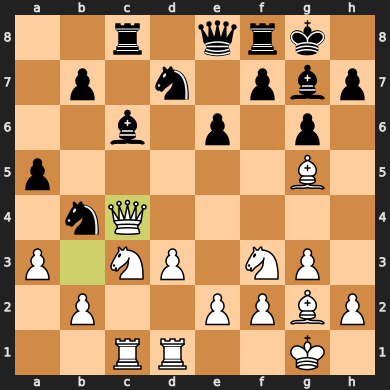

In [114]:
board

In [115]:
board.fen

<bound method Board.fen of Board('2r1qrk1/1p1n1pbp/2b1p1p1/p5B1/1nQ5/P1NP1NP1/1P2PPBP/2RR2K1 b - - 0 17')>

In [116]:
board.piece_at(chess.B3)

In [118]:
# this will give an error because is_trapped pushed the queen move and it is not on b3 anymore.
is_in_bad_spot(board, chess.B3)

AssertionError: 

##### Example(2):

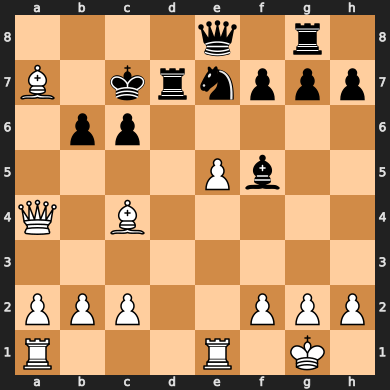

In [121]:
board = Board("4q1r1/B1krnppp/1pp5/4Pb2/Q1B5/8/PPP2PPP/R3R1K1 w - - 0 19")
board

In [122]:
is_trapped(board, chess.A7)

False

In [124]:
# I came up with this game. Here is the pgn
"""
[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "*"]

1. d4 d5 2. Qd3 e5 3. dxe5 Bc5 4. e3 Nc6 5. Nc3 d4 6. exd4 Nxd4 7. Qc4 Ne7 8.
Bd3 Bf5 9. Qa4+ c6 10. Bc4 Qd7 11. Nge2 O-O-O 12. O-O Rhg8 13. Nxd4 Bxd4 14. Ne2
Qe8 15. Nxd4 Rxd4 16. Be3 Rd7 17. Rfe1 Kc7 18. Bxa7 b6 *
"""

'\n[Event "?"]\n[Site "?"]\n[Date "????.??.??"]\n[Round "?"]\n[White "?"]\n[Black "?"]\n[Result "*"]\n\n1. d4 d5 2. Qd3 e5 3. dxe5 Bc5 4. e3 Nc6 5. Nc3 d4 6. exd4 Nxd4 7. Qc4 Ne7 8.\nBd3 Bf5 9. Qa4+ c6 10. Bc4 Qd7 11. Nge2 O-O-O 12. O-O Rhg8 13. Nxd4 Bxd4 14. Ne2\nQe8 15. Nxd4 Rxd4 16. Be3 Rd7 17. Rfe1 Kc7 18. Bxa7 b6 *\n'

#### attacker_pieces

In [119]:
def attacker_pieces(board: Board, color: Color, square: Square) -> List[Piece]:
    return [p for p in [board.piece_at(s) for s in board.attackers(color, square)] if p]

#### to be checked later

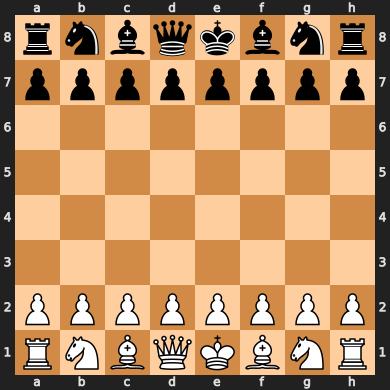

In [121]:
game.board()

In [122]:
game.root()

<Game at 0x7f17e9512710 ('slawa' vs. 'manjiparty', '????.??.??' at 'https://lichess.org/ZmnMOSG5')>

In [158]:
game.next()

<ChildNode at 0x7f17e9563c10 (1. e4 ...)>

In [125]:
game.turn()

True

In [126]:
game.ply()

0

In [154]:
game.game()

<Game at 0x7f17e955ee90 ('slawa' vs. 'manjiparty', '????.??.??' at 'https://lichess.org/ZmnMOSG5')>

In [153]:
game.is_end()

False

In [131]:
game.is_mainline()

True

In [132]:
game.starts_variation()

False